```
From: https://github.com/ksatola
Version: 0.0.1

TODOs
1. https://machinelearningmastery.com/calculate-feature-importance-with-python/
2. https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e
3. 
```

# Feature Importance
Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features. In the example below we construct a ExtraTreesClassifier classifier for the Pima Indians onset of diabetes dataset.

In [3]:
# Connect with underlying Python code
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../src')

In [4]:
from datasets import (
    get_dataset,
)

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [6]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

# target = 'class'
df = get_dataset('pima-indians-diabetes')
df.head()
array = df.values
X = array[:,0:8]
y = array[:,8]

# Feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
print(model.feature_importances_)

[0.106863   0.25251837 0.10205019 0.07525735 0.0802897  0.13462322
 0.11187434 0.13652383]


You can see that we are given an importance score for each attribute where the larger score the more important the attribute. The scores suggest at the importance of plas, age and mass.

In [7]:
import plotnine as pln

In [10]:
df.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [11]:
ind_features = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

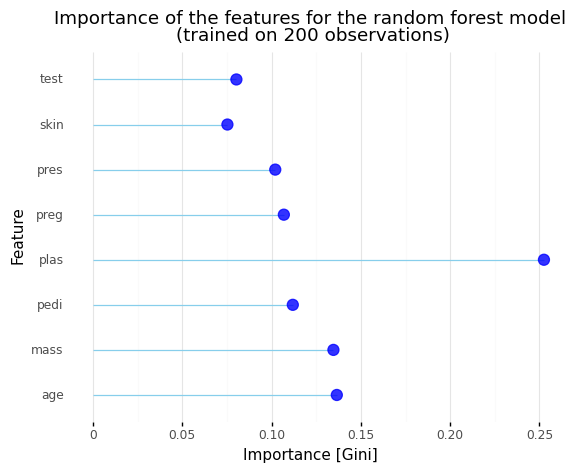

<ggplot: (8776405648544)>

In [12]:
fi_df = pd.DataFrame({'importance': model.feature_importances_,
                      'feature': df[ind_features].columns})

(pln.ggplot(pln.aes(x='feature', y='importance'), data=fi_df.sort_values('importance', ascending=False).iloc[:10]) +
 pln.geom_segment(pln.aes(x='feature', xend='feature', y=0, yend='importance'), color="skyblue") +
 pln.geom_point(color="blue", size=4, alpha=0.8) +
 pln.labs(x='Feature', y='Importance [Gini]', 
          title='Importance of the features for the random forest model\n (trained on 200 observations)') +
 pln.coord_flip() +
 pln.theme_bw() +
 pln.theme(
    panel_grid_major_y=pln.element_blank(),
    panel_border=pln.element_blank(),
    axis_ticks_major_y=pln.element_blank()
 )
 )

In [13]:
import shap

In [55]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df[ind_features])
#shap_values = shap_values[0]

In [58]:
shap_values[0][2, :]

array([-0.12109769, -0.34848379,  0.00688131, -0.03264527, -0.05800483,
        0.02473373, -0.04025242, -0.08217271])

In [59]:
np.round(df[ind_features].iloc[2, :], 3)

preg      8.000
plas    183.000
pres     64.000
skin      0.000
test      0.000
mass     23.300
pedi      0.672
age      32.000
Name: 2, dtype: float64

In [63]:
explainer.expected_value

array([0.65104167, 0.34895833])

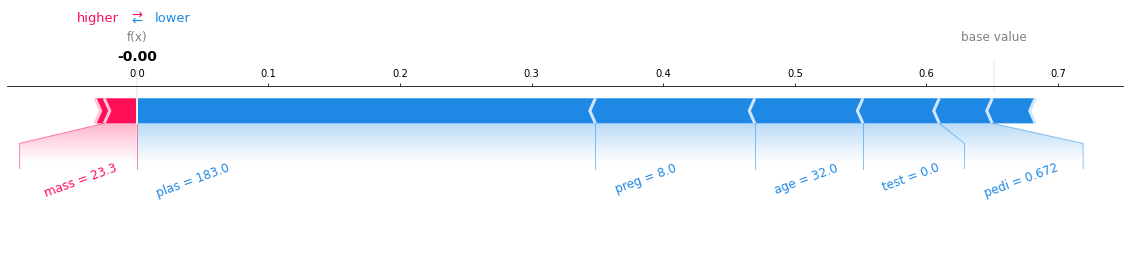

In [64]:
shap.force_plot(explainer.expected_value[0], shap_values[0][2, :], np.round(df[ind_features].iloc[2, :], 3), matplotlib=True, text_rotation=20)

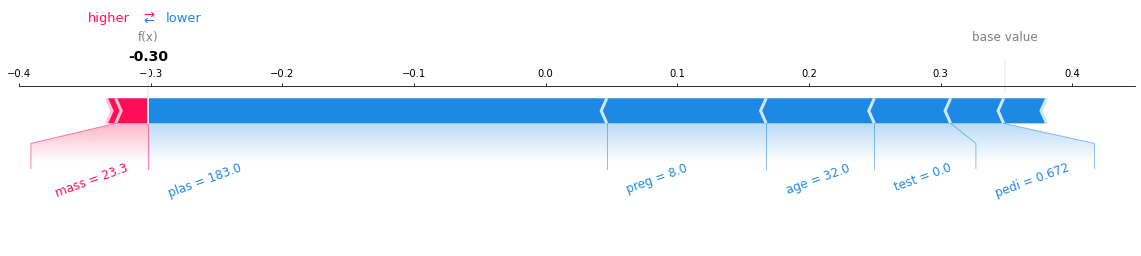

In [69]:
shap.force_plot(explainer.expected_value[1], shap_values[0][2, :], np.round(df[ind_features].iloc[2, :], 3), matplotlib=True, text_rotation=20)

In [71]:
# explantaions for the whole holdout set
shap.force_plot(explainer.expected_value[0], shap_values[0], df[ind_features])  # doesn't work in jupyterlab :(